<a href="https://colab.research.google.com/github/rajendranast012-stack/in-silico-lab1/blob/main/MACCS_And_Morgan_fingerprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this is the code extrscted form the following github link:
https://github.com/codetodiscovery/Fingerprints-basics/blob/main/HowFingerprintsWork.ipynb

In [2]:
# Install RDKit.
# %%capture
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 62.2 MB/s eta 0:00:00


In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import warnings

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem, PandasTools, MACCSkeys
from rdkit import DataStructs
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity

from collections import Counter
pd.set_option('display.max_rows', None)

warnings.filterwarnings("ignore")

In [9]:

df = pd.read_excel('/content/name.xlsx')
df.head()

,Name,SMILES
0,"2-(3,4-dihydroxyphenyl)-3,5,7-trihydroxychrome...",C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O
1,"5,7-dihydroxy-8-methoxy-2-phenylchromen-4-one",COC1=C(C=C(C2=C1OC(=CC2=O)C3=CC=CC=C3)O)O
2,"3,5-dihydroxy-2-(4-hydroxyphenyl)-7-methoxychr...",COC1=CC(=C2C(=C1)OC(=C(C2=O)O)C3=CC=C(C=C3)O)O
3,"3,5-dihydroxy-2-(4-hydroxy-3-methoxyphenyl)-7-...",COC1=CC(=C2C(=C1)OC(=C(C2=O)O)C3=CC(=C(C=C3)O)...
4,"3,5,7-trihydroxy-2-(4-hydroxy-3-methoxyphenyl)...",COC1=C(C=CC(=C1)C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O


In [10]:
# Creating molecular object from Smiles

PandasTools.AddMoleculeColumnToFrame(df,'SMILES','mol')


df.head()

,Name,SMILES,mol
0,"2-(3,4-dihydroxyphenyl)-3,5,7-trihydroxychrome...",C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O,<rdkit.Chem.rdchem.Mol object at 0x78ae4828ba00>
1,"5,7-dihydroxy-8-methoxy-2-phenylchromen-4-one",COC1=C(C=C(C2=C1OC(=CC2=O)C3=CC=CC=C3)O)O,<rdkit.Chem.rdchem.Mol object at 0x78ae468a4ba0>
2,"3,5-dihydroxy-2-(4-hydroxyphenyl)-7-methoxychr...",COC1=CC(=C2C(=C1)OC(=C(C2=O)O)C3=CC=C(C=C3)O)O,<rdkit.Chem.rdchem.Mol object at 0x78ae468a4c10>
3,"3,5-dihydroxy-2-(4-hydroxy-3-methoxyphenyl)-7-...",COC1=CC(=C2C(=C1)OC(=C(C2=O)O)C3=CC(=C(C=C3)O)...,<rdkit.Chem.rdchem.Mol object at 0x78ae468a4c80>
4,"3,5,7-trihydroxy-2-(4-hydroxy-3-methoxyphenyl)...",COC1=C(C=CC(=C1)C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O,<rdkit.Chem.rdchem.Mol object at 0x78ae468a4cf0>


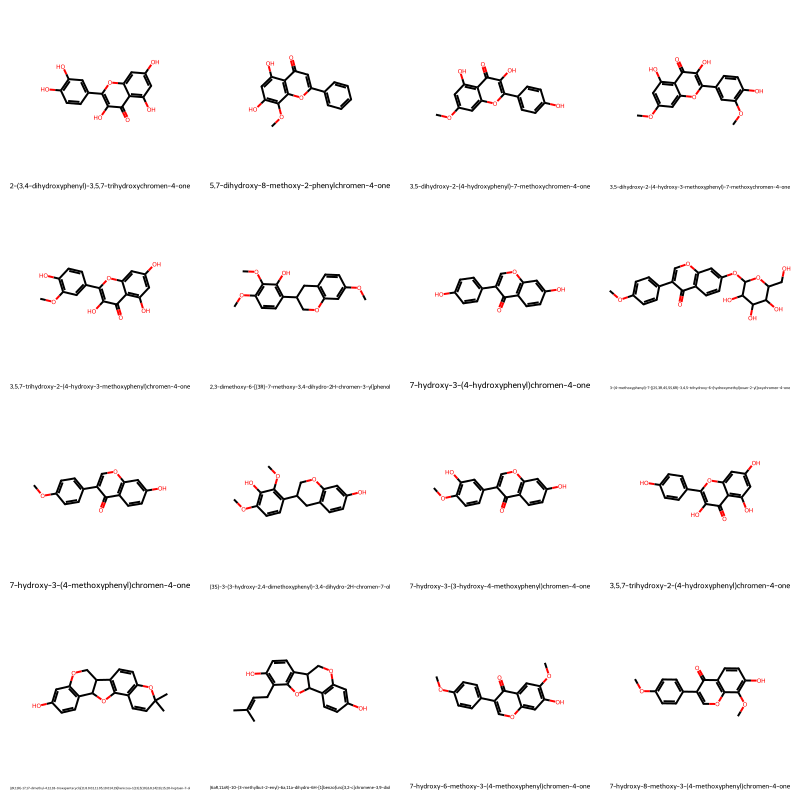

In [13]:
Draw.MolsToGridImage(df['mol'][:16],molsPerRow=4,subImgSize=(200,200),legends=[x for x in df['Name'][:16]])


MACCS Key


In [15]:
maccs_bv = MACCSkeys.GenMACCSKeys(df['mol'][4])


maccs_bv



maccs_np = np.array(maccs_bv)


maccs_np

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0])

In [16]:
maccs = pd.DataFrame(maccs_np).T
maccs


,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,0


In [17]:
# count the number of bits
Counter(maccs_np)

Counter({np.int64(0): 136, np.int64(1): 31})

In [18]:
# print the position of On bits
print(f'The bits are on at position {list(maccs_bv.GetOnBits())}')

The bits are on at position [53, 57, 62, 72, 89, 93, 98, 101, 105, 113, 125, 126, 127, 131, 137, 139, 140, 143, 144, 145, 146, 150, 152, 154, 157, 159, 160, 162, 163, 164, 165]


for choosing specific molecules form the file


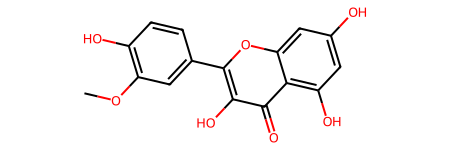

In [19]:
df['mol'][4]

Morgan Fingerprint (Circular Fingerprint)

In [31]:

mf_bv = AllChem.GetMorganFingerprintAsBitVect(df['mol'][4], radius=2, nBits=2048, bitInfo=bi)

mf_bv

[09:00:42] DEPRECATION WARNING: please use MorganGenerator


In [22]:
# convert the bit vector into np array
mf_np = np.array(mf_bv)
# count the number of bits
Counter(mf_bv)


Counter({0: 2008, 1: 40})

In [23]:

# print the position of on bits
print(f'The bits are on at position {list(mf_bv.GetOnBits())}')

The bits are on at position [36, 54, 167, 202, 249, 285, 314, 472, 501, 525, 614, 650, 656, 695, 745, 807, 841, 845, 875, 896, 897, 1057, 1160, 1168, 1181, 1195, 1242, 1380, 1475, 1536, 1602, 1604, 1607, 1609, 1750, 1808, 1873, 1970, 1984, 2028]


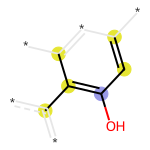

In [26]:
Draw.DrawMorganBit(mol = df['mol'][4], bitId=54, bitInfo=bi)

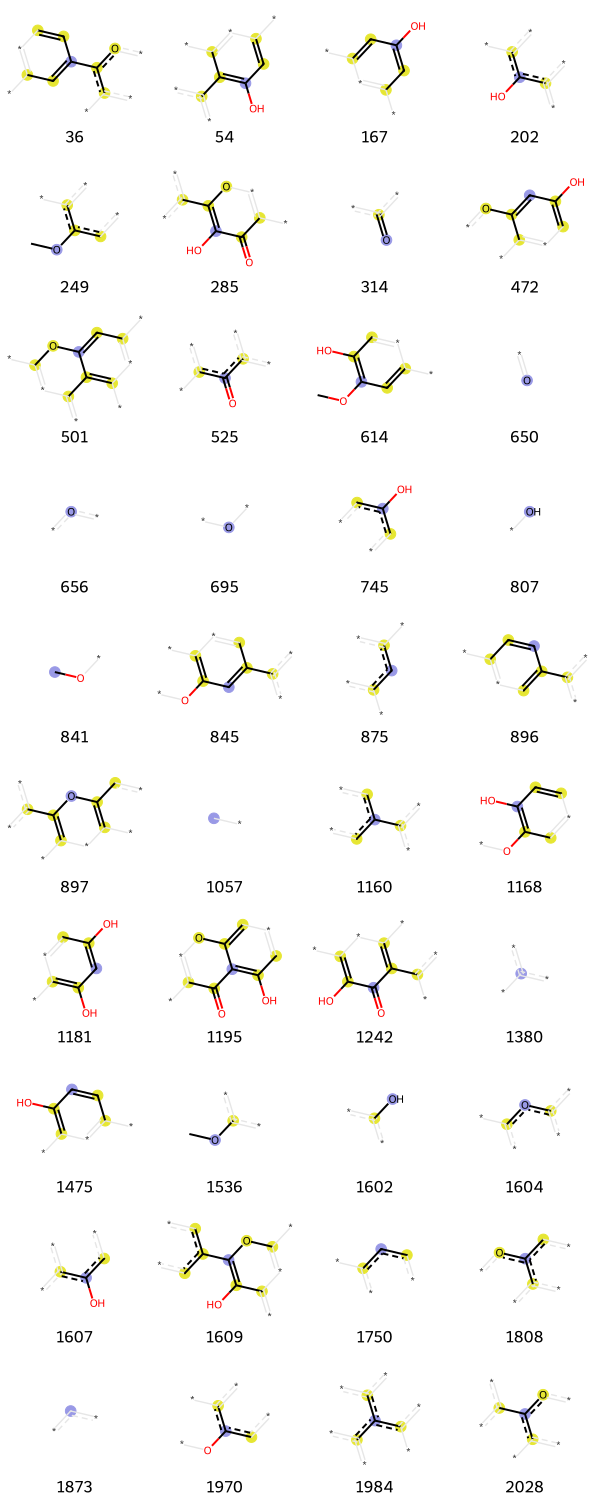

In [32]:
tpls = [(df['mol'][4],x,bi) for x in mf_bv.GetOnBits()]
Draw.DrawMorganBits(tpls,molsPerRow=4,legends=[str(x) for x in mf_bv.GetOnBits()])